# Making predictions with simple linear regression

You have learned how to model a simple linear regression model with the *statsmodels* package. We are now going to look at how to make predictions using this model. There are two packages in Python to do this: *statsmodels* and *sklearn*. First, let's see how to make a prediction with the *statsmodels* package. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

#Import the data box office revenues
#Since we will be making predictions, let's load 10 observations
d = {"y":[23,12,36,27,45,70,55,8,62,28],"x":[29,49,89,110,210,190,153,20,122,41]}
data = pd.DataFrame(data = d)

#To make predictions, we have to make a split between a train and a test set
#Use the train_test_split function from sklearn to do so
from sklearn.model_selection import train_test_split

#Make a train and test split (70/30)
train, test = train_test_split(data, test_size=0.30, random_state=42)

#Build a statsmodels SLR
#Add the intercept
train = sm.add_constant(train)
test = sm.add_constant(test)

#Fit an OLS model and make a prediction
linreg = sm.OLS(train[["y"]],train[["const","x"]]).fit()
pred_stats = linreg.predict(test[["const","x"]])

#The predictions of our test set data
print(pred_stats)

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


8    36.895146
1    23.789109
5    49.103509
dtype: float64


Now that we have the predictions, we can evaluate prediction accuracy. We will evaluate our simple linear regression model using the mean absolute error (MAE), root mean squared error (RMSE), and the R-squared on the test set.

In [2]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

print("MAE: "+str(mae(test[["y"]],pred_stats)))
print("RMSE: "+str(np.sqrt(mse(test[["y"]],pred_stats))))
print("R-squared test: "+str(r2(test[["y"]],pred_stats)))
print("R-squared train: "+str(linreg.rsquared))

MAE: 19.2634848922
RMSE: 20.049107665
R-squared test: 0.389726642464
R-squared train: 0.678779457109


As you can see, the R-squared on the training set is higher than on the test set. This is logical since OLS fits the paramaters on the training set such that the R-squared is maximised. The R-squared on the test set will thus be lower by definition and will also be a better reflection of the true explanatory power of your model. 

Now, let's make predictions wih the *sklearn* package. This package is the go-to package for predictive analytics in Python. Since it is focused on predicting, it does not have a nice output summary for simple linear regression. So, if you are interested in interpreting the model, *statsmodels* might be more suitable. However, for true predictive purposes, *sklearn* might be more convenient.

In [3]:
from sklearn.linear_model import LinearRegression

#Since sklearn automatically adds the intercept, let's make the train/test splits again
train, test = train_test_split(data,test_size=0.3, random_state=42)

#Initiate the linear regression model
lm = LinearRegression()

#Fit the model
lm.fit(train[['x']],train[['y']])

#We can have a look at intercept and the coefficient
print("intercept: " + str(lm.intercept_))
print("x: " + str(lm.coef_))

#Make predictions 
pred_sk = lm.predict(test[["x"]])

#Check whether the results of statsmodels and sklearn are the same
pred_sk.all()==pred_stats.all()

intercept: [ 14.99190618]
x: [[ 0.17953475]]


True

In [4]:
#Evaluate performance
print("MAE: "+str(mae(test[["y"]],pred_sk)))
print("RMSE1: "+str(np.sqrt(mse(test[["y"]],pred_sk))))
print("R-squared test: "+str(r2(test[["y"]],pred_sk)))
print("R-squared train: "+str(lm.score(train[["x"]],train[["y"]])))

MAE: 19.2634848922
RMSE1: 20.049107665
R-squared test: 0.389726642464
R-squared train: 0.678779457109


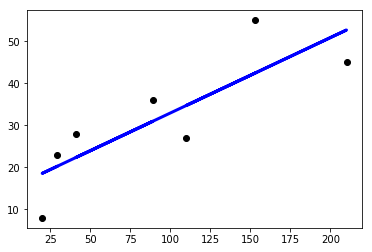

In [5]:
#Make a plot of the training set and regression line
plt.scatter(train[["x"]], train[["y"]],  color='black')

regression_line = lm.intercept_ + lm.coef_*train[["x"]]
plt.plot(train[["x"]], regression_line, color = 'blue',  linewidth = 3)

plt.show()

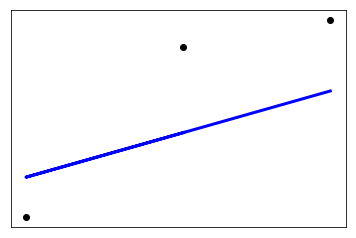

In [6]:
#Make plot of the predictions 
plt.scatter(test[["x"]], test[["y"]],  color='black')
plt.plot(test[["x"]], pred_sk, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()